## Clustering on Marketing

<img src='https://frenzy86.s3.eu-west-2.amazonaws.com/python/clusmarke.png' width=1000>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Mall_Customers.csv

In [3]:
# path = 'Mall_Customers.csv'
path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Mall_Customers.csv'

In [4]:
df = pd.read_csv(path)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


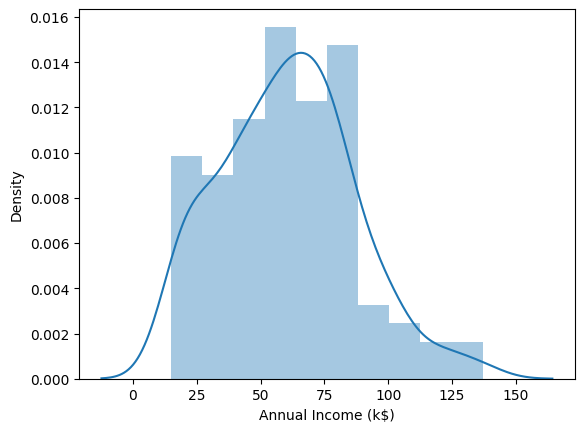

In [ ]:
import seaborn as sns

sns.distplot(df['Annual Income (k$)']);

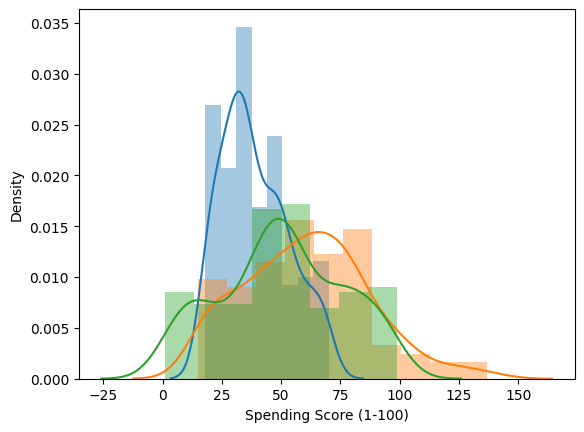

In [6]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']

for i in columns:
    sns.distplot(df[i])


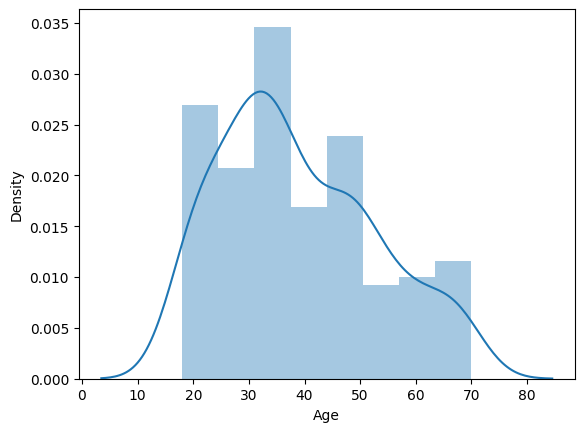

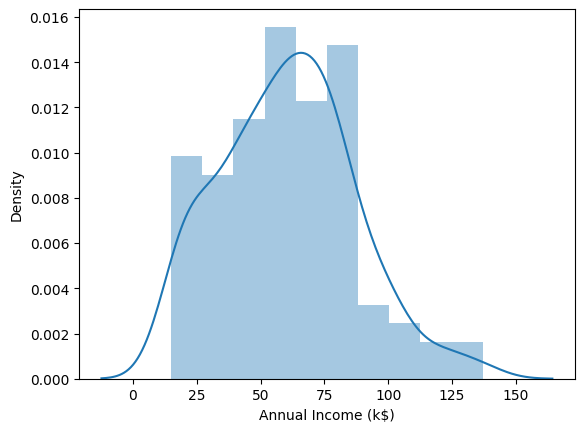

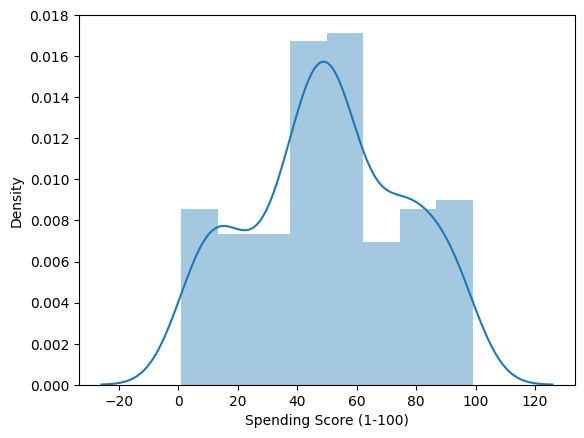

In [ ]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.distplot(df[i])

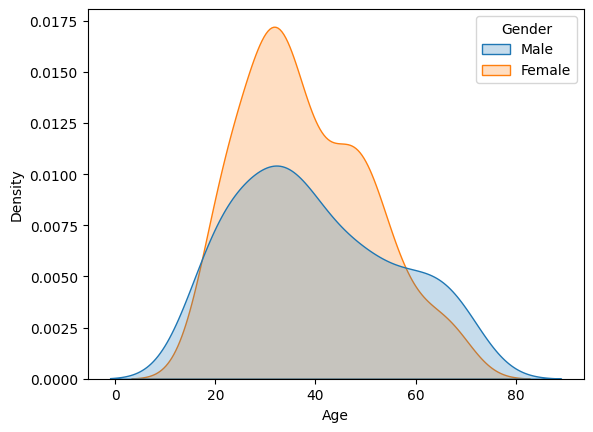

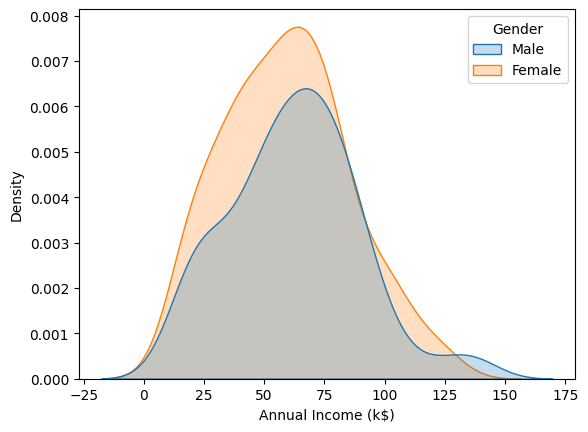

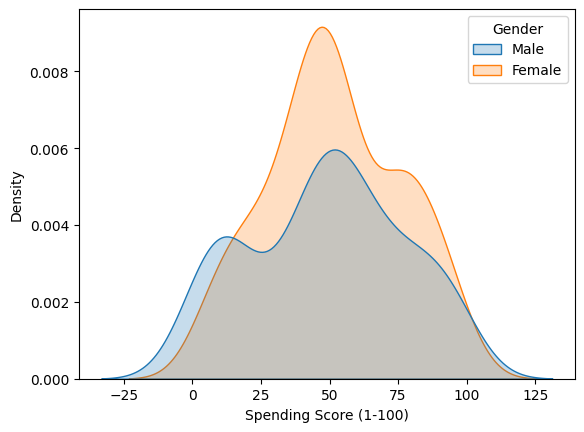

In [ ]:
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=df[i], hue="Gender",shade=True)

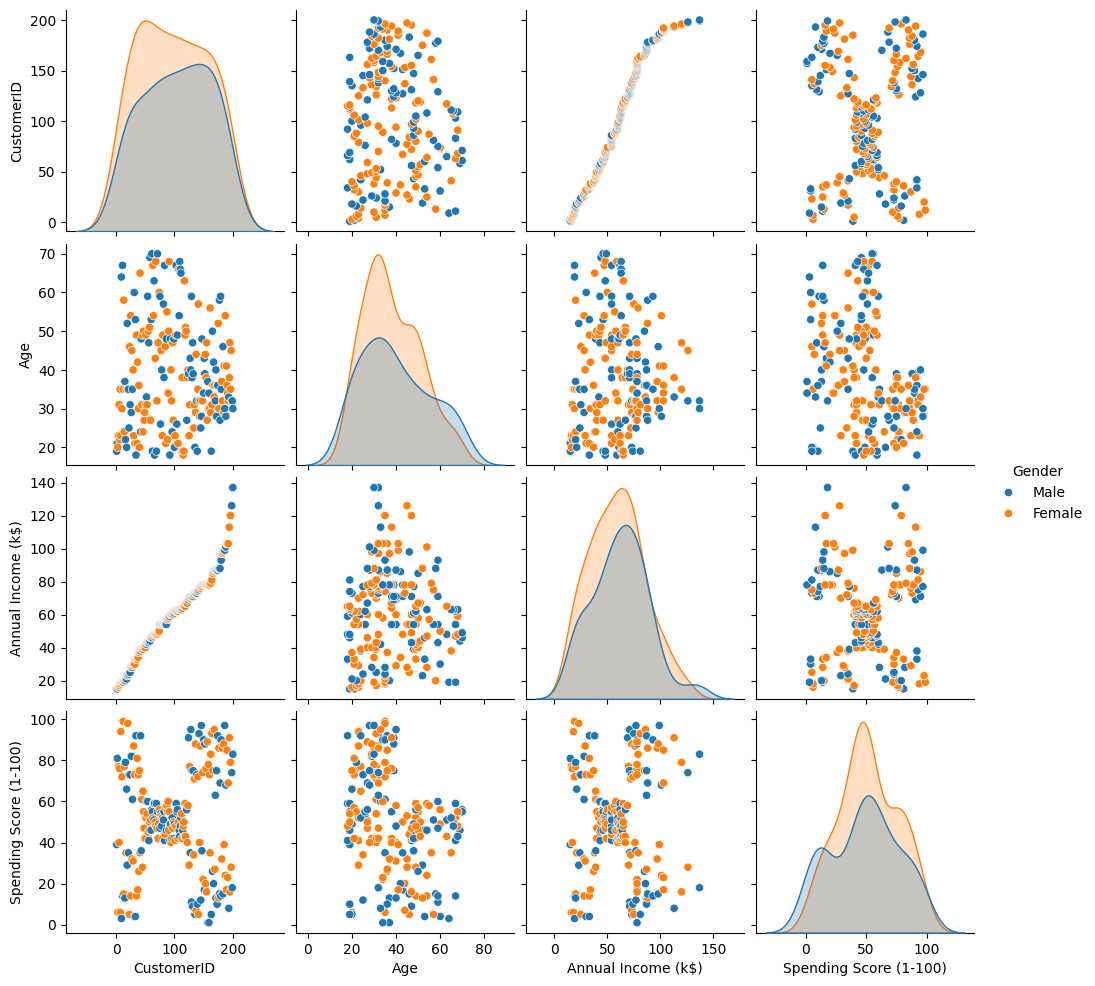

In [ ]:
sns.pairplot(df,hue='Gender')

In [7]:
df.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

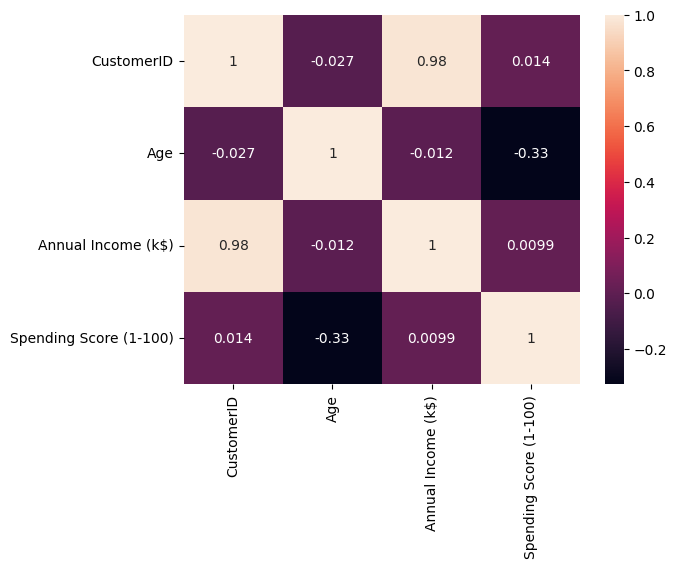

In [8]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

#### La correlazione non ci aiuta... sono tutte vicine allo zero

### Clustering

In [9]:
from sklearn.cluster import KMeans

clustering1 = KMeans()

In [10]:
## Univariate 1 feature
clustering1.fit(df[['Annual Income (k$)']])

KMeans()

In [11]:
clustering1.labels_

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4,
       4, 4], dtype=int32)

In [12]:
df['IncomeClusters']=clustering1.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),IncomeClusters
0,1,Male,19,15,39,7
1,2,Male,21,15,81,7
2,3,Female,20,16,6,7
3,4,Female,23,16,77,7
4,5,Female,31,17,40,7
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,4
197,198,Male,32,126,74,4
198,199,Male,32,137,18,4


In [13]:
df['IncomeClusters'].value_counts()

,count
IncomeClusters,
6,42
3,36
0,36
1,26
7,24
2,16
5,14
4,6


In [14]:
clustering1.inertia_

2857.4416971916967

## Elbow method - Clustering su 1 variabile "Annual Income (k$)"
(parto sempre da una variabile e poi le aggiungo)

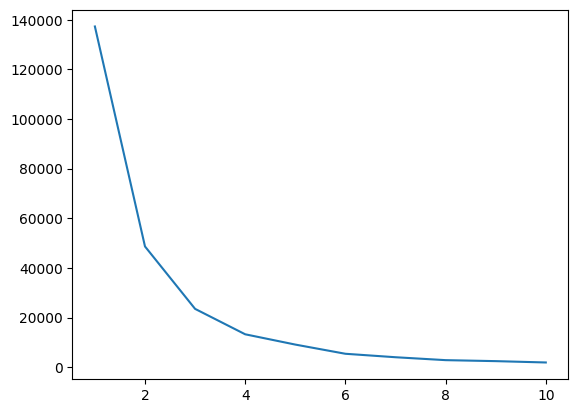

In [15]:
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

plt.plot(range(1,11), inertia_scores)

## Verify the Silhouette

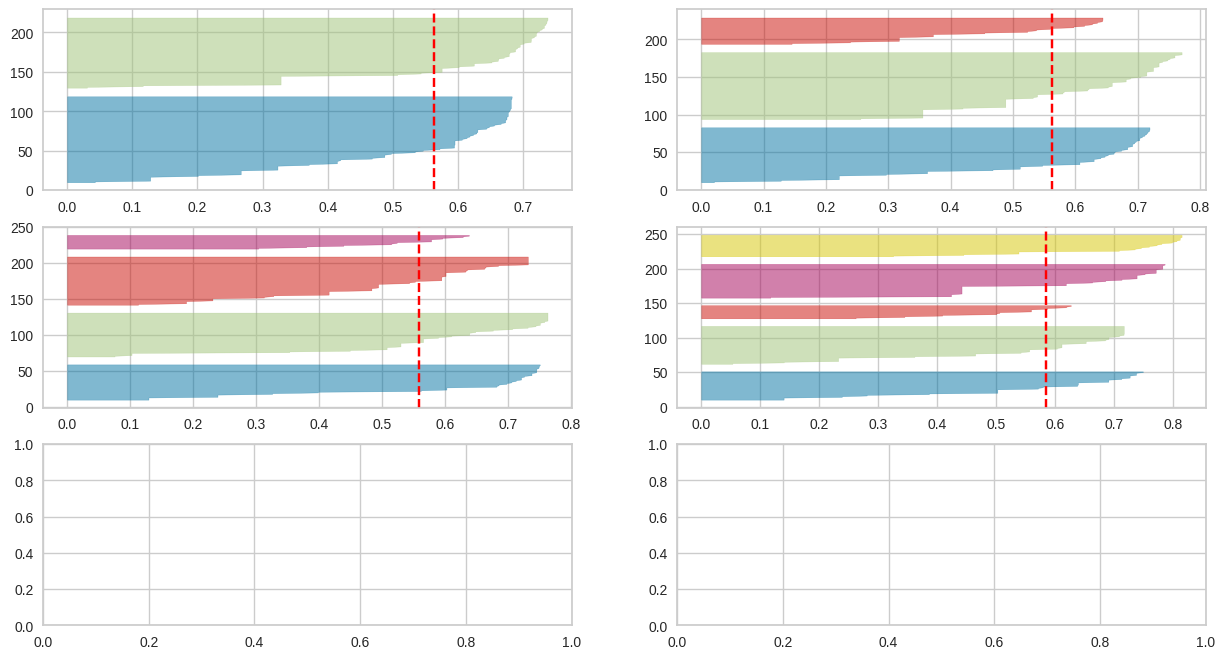

In [16]:
from yellowbrick.cluster import SilhouetteVisualizer

X = df[['Annual Income (k$)']]

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

## Dendogramma

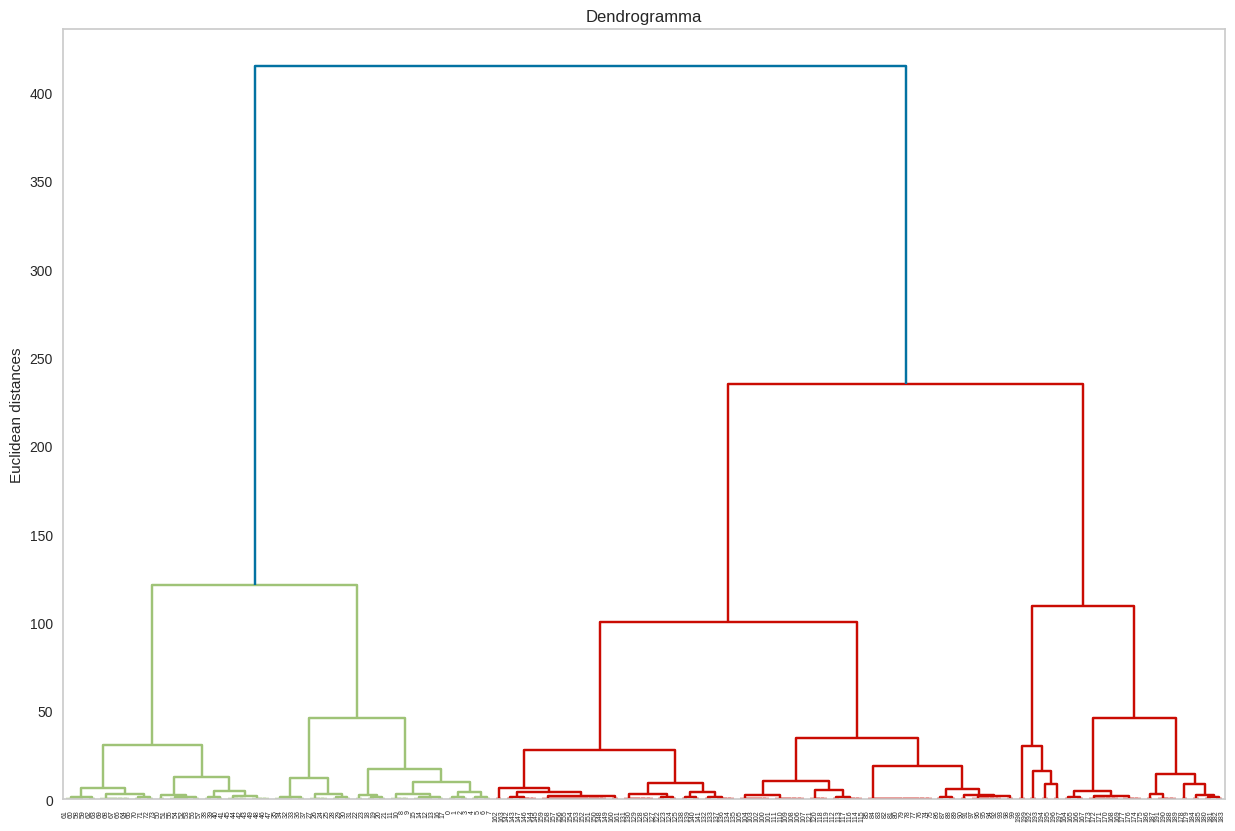

In [17]:
import scipy.cluster.hierarchy as ch

plt.figure(figsize=(15,10))
plt.title('Dendrogramma')
plt.ylabel('Euclidean distances')
plt.grid(False)
dendrogram = ch.dendrogram(ch.linkage(X, method = 'ward'))
plt.show()

In [18]:
# aggiorno il numero di cluster==3
clustering1 = KMeans(n_clusters=3)
clustering1.fit(df[['Annual Income (k$)']])
df['IncomeClusters']=clustering1.labels_
df['IncomeClusters'].value_counts()

,count
IncomeClusters,
1,92
2,72
0,36


In [19]:
df.groupby(['IncomeClusters'])[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
IncomeClusters,,,
0,37.833333,99.888889,50.638889
1,39.184783,66.717391,50.054348
2,38.930556,33.027778,50.166667


Annual Income (k$)

## Elbow method - Clustering su 2 variabili 'Annual Income (k$)','Spending Score (1-100)'

In [20]:
## Bivariate 2 features
clustering2 = KMeans()
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending&IncomeCluster'] = clustering2.labels_
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),IncomeClusters,Spending&IncomeCluster
0,1,Male,19,15,39,2,4
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,2,4
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,2,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,6
196,197,Female,45,126,28,0,7
197,198,Male,32,126,74,0,6
198,199,Male,32,137,18,0,7


In [21]:
df['Spending&IncomeCluster'].value_counts()

,count
Spending&IncomeCluster,
5,43
1,43
2,29
4,22
3,22
0,21
7,10
6,10


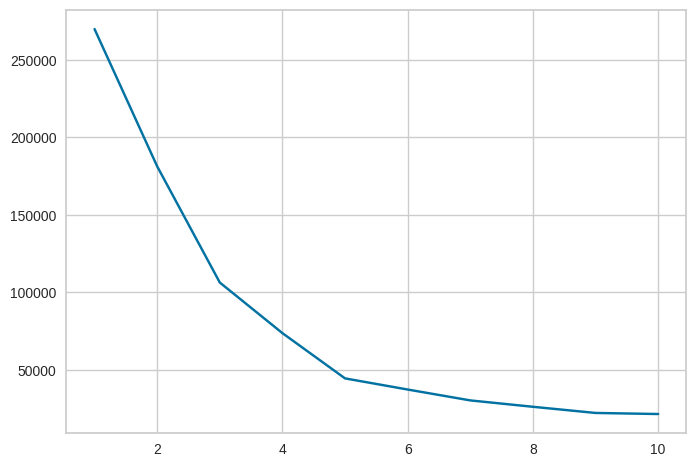

In [22]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

plt.plot(range(1,11), inertia_scores2)

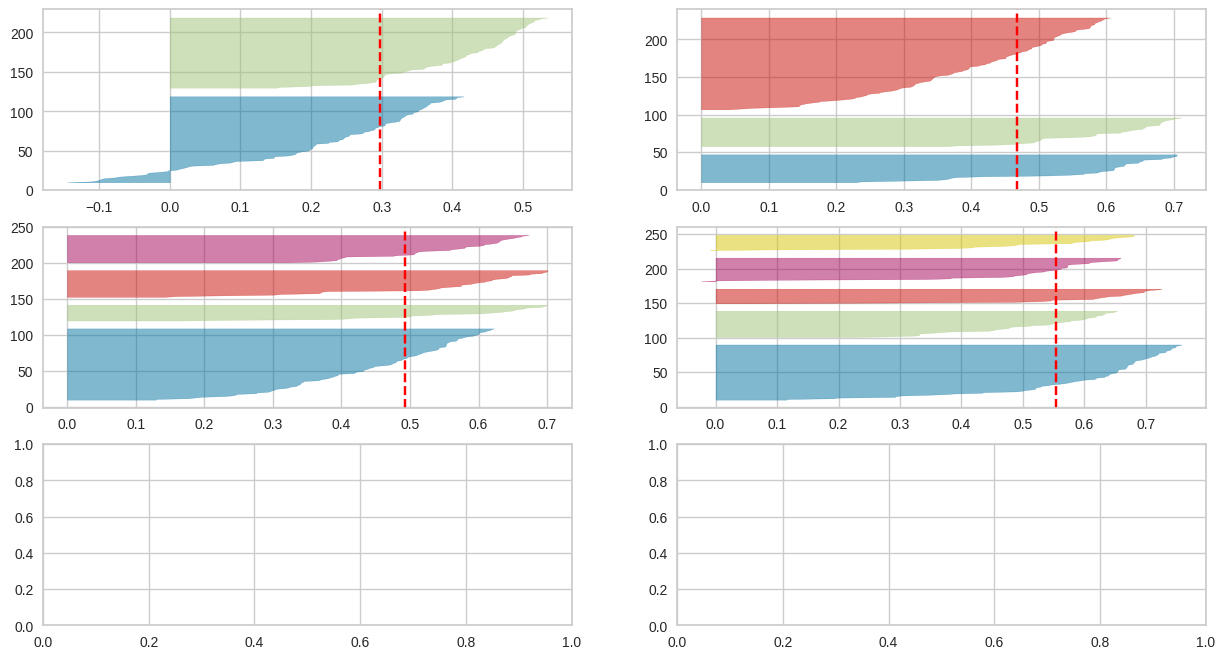

In [23]:
from yellowbrick.cluster import SilhouetteVisualizer

X = df[['Annual Income (k$)','Spending Score (1-100)']]

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

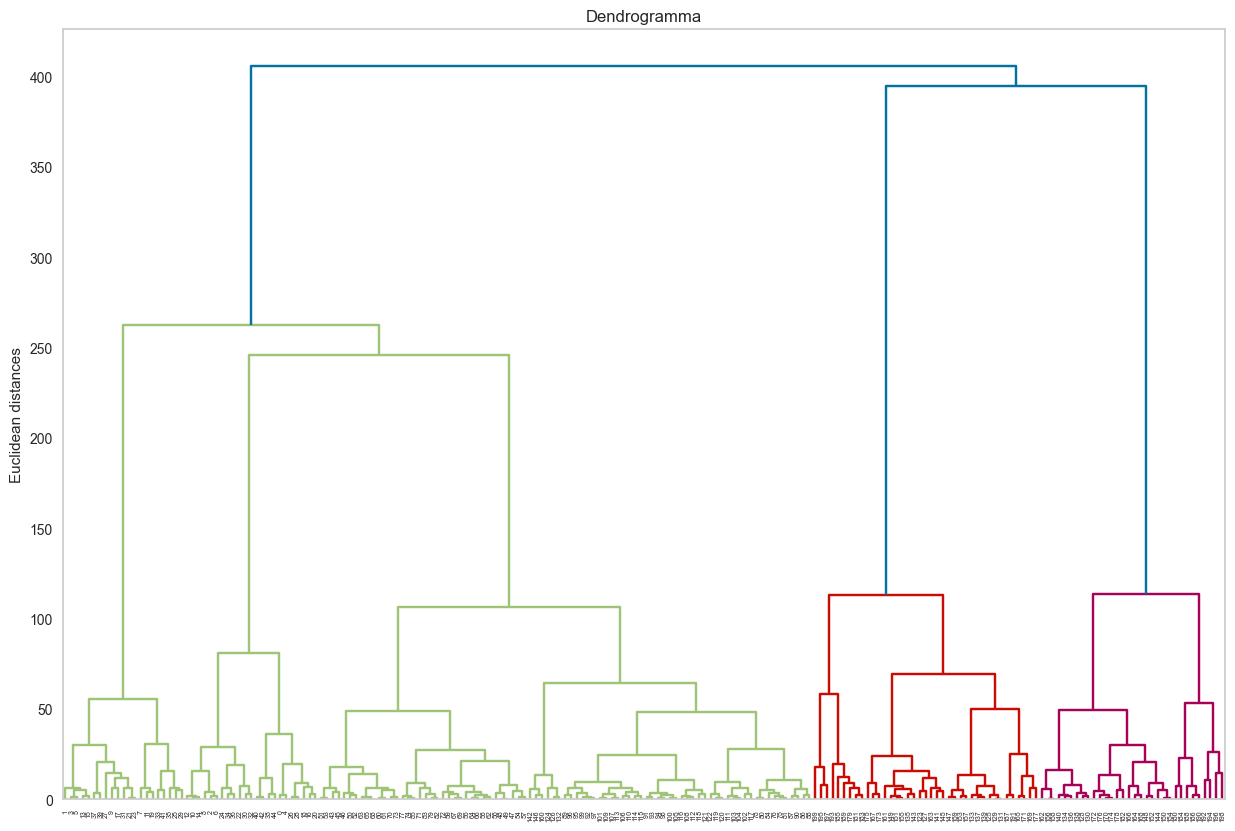

In [ ]:
import scipy.cluster.hierarchy as ch

plt.figure(figsize=(15,10))
plt.title('Dendrogramma')
plt.ylabel('Euclidean distances')
plt.grid(False)
dendrogram = ch.dendrogram(ch.linkage(X, method = 'ward'))
plt.show()

In [24]:
# aggiorno il numero di cluster==5
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending&IncomeCluster']=clustering2.labels_
df['Spending&IncomeCluster'].value_counts()

,count
Spending&IncomeCluster,
1,81
0,39
3,35
2,23
4,22


In [25]:
centers = pd.DataFrame(clustering2.cluster_centers_,columns=['x','y'])
centers

,x,y
0,86.538462,82.128205
1,55.296296,49.518519
2,26.304348,20.913043
3,88.200000,17.114286
4,25.727273,79.363636


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

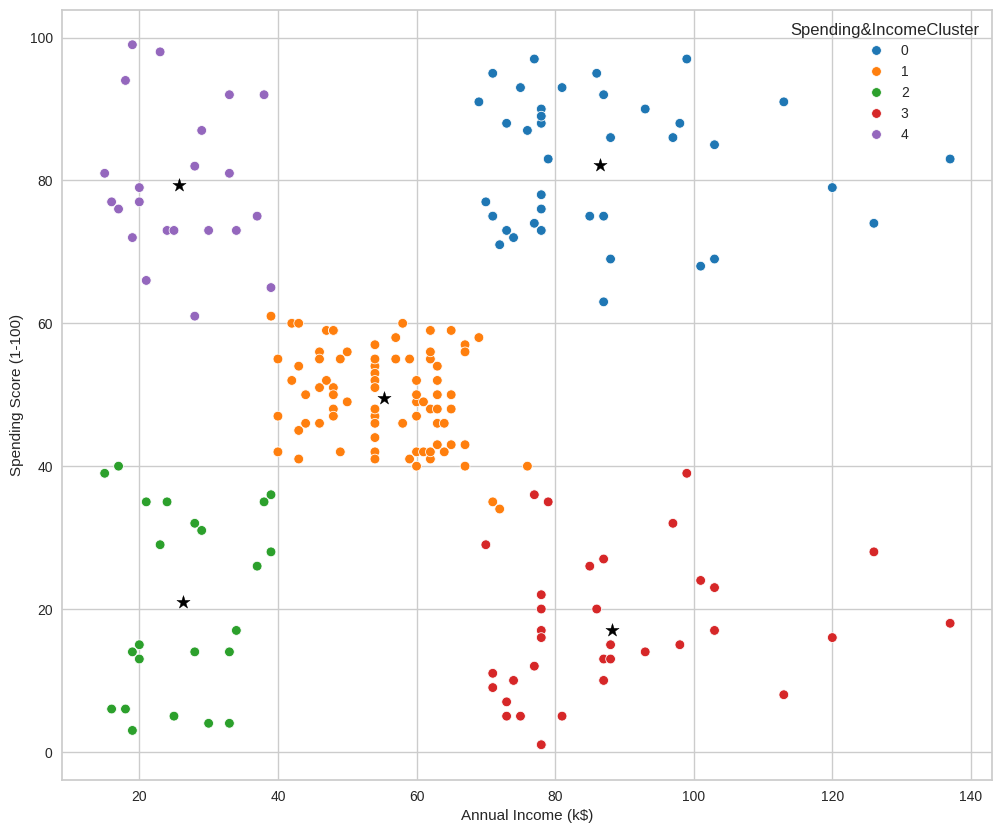

In [26]:
import seaborn as sns
plt.figure(figsize=(12,10))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data= df,x='Annual Income (k$)',y='Spending Score (1-100)',
                hue='Spending&IncomeCluster',palette='tab10')

In [27]:
pd.crosstab(df['Spending&IncomeCluster'],df['Gender'])

Gender,Female,Male
Spending&IncomeCluster,,
0,21,18
1,48,33
2,14,9
3,16,19
4,13,9


In [28]:
pd.crosstab(df['Spending&IncomeCluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending&IncomeCluster,,
0,0.538462,0.461538
1,0.592593,0.407407
2,0.608696,0.391304
3,0.457143,0.542857
4,0.590909,0.409091


In [29]:
dfd =pd.get_dummies(df,drop_first=True)
dfd

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),IncomeClusters,Spending&IncomeCluster,Gender_Male
0,1,19,15,39,2,2,True
1,2,21,15,81,2,4,True
2,3,20,16,6,2,2,False
3,4,23,16,77,2,4,False
4,5,31,17,40,2,2,False
...,...,...,...,...,...,...,...
195,196,35,120,79,0,0,False
196,197,45,126,28,0,3,False
197,198,32,126,74,0,0,True
198,199,32,137,18,0,3,True


In [30]:
dfd.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'IncomeClusters', 'Spending&IncomeCluster', 'Gender_Male'],
      dtype='object')

## Clustering su tutte le variabili

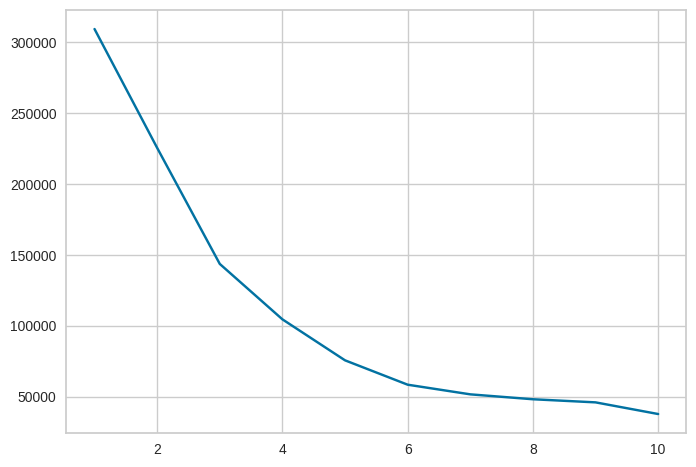

In [31]:
## Multivariate 6 features
clustering3 = KMeans()
clustering3.fit(dfd[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','IncomeClusters', 'Spending&IncomeCluster', 'Gender_Male']])

inertia_scores3 = []
for i in range(1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dfd[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','IncomeClusters', 'Spending&IncomeCluster', 'Gender_Male']])
    inertia_scores3.append(kmeans3.inertia_)

plt.plot(range(1,11), inertia_scores3)

# the result here are much worst

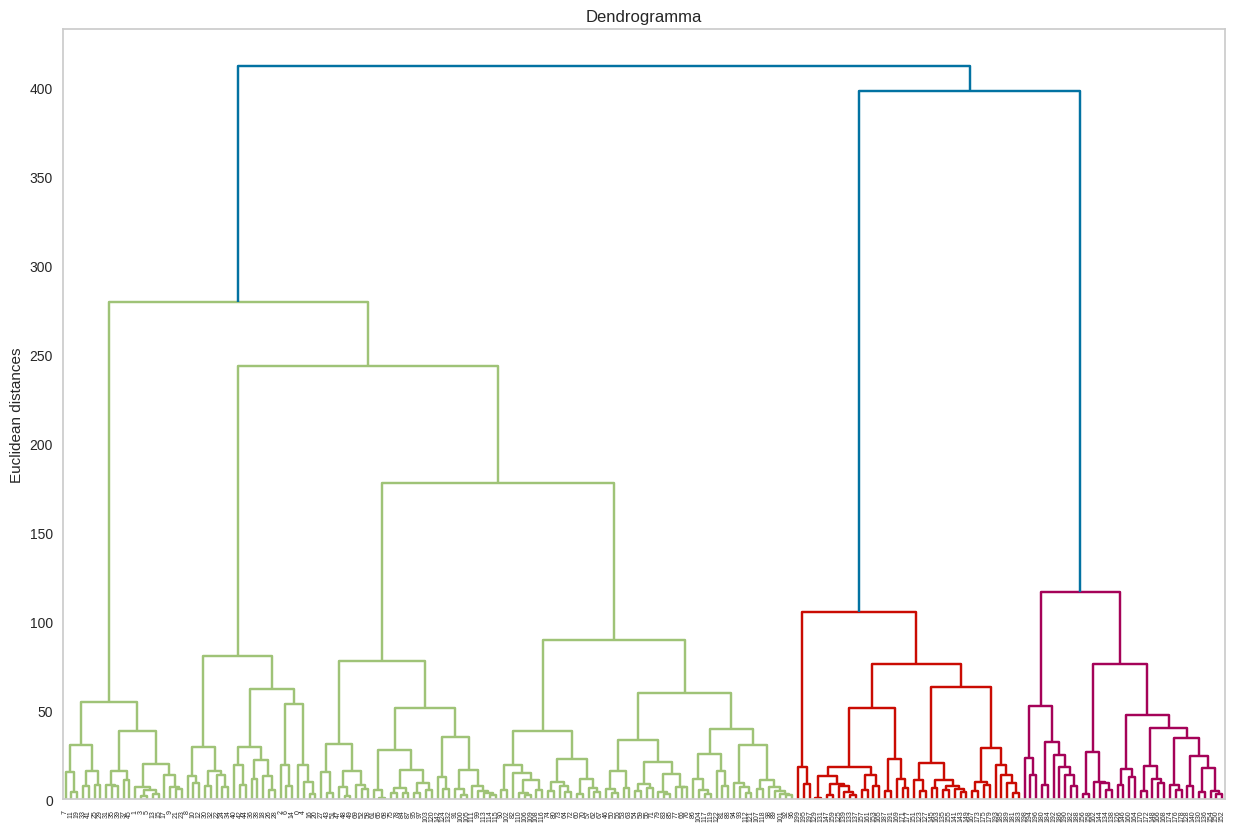

In [32]:
import scipy.cluster.hierarchy as ch

X = dfd[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','IncomeClusters', 'Spending&IncomeCluster', 'Gender_Male']]

plt.figure(figsize=(15,10))
plt.title('Dendrogramma')
plt.ylabel('Euclidean distances')
plt.grid(False)
dendrogram = ch.dendrogram(ch.linkage(X, method = 'ward'))
plt.show()